<a href="https://colab.research.google.com/github/ameyaoka/ml-notebooks/blob/main/Internship_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install datasets

In [10]:
import  pandas as pd
import numpy as np

In [11]:
from datasets import load_dataset

dataset = load_dataset("Ammok/apple_stock_price_from_1980-2021")

In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 10468
    })
})

In [13]:
train_df = dataset['train'].to_pandas()
train_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [14]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [16]:
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


1. There are 10,468 observations in the dataset.
2. A high standard deviation in a tabular data means that the values are generally far from the mean
3.  The minimum and maximum values for Open, High, Low, Close, and Adj Close prices are significantly different,   indicating a large range of values for these variables.


### Data preprocessing:

1. Here we are going to split the data, Since the data is time series, we will take the first 90% of data as training and the last 10% as test data.

In [18]:

train_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the dataset.

In [24]:
train_df.duplicated().sum()

0


There are no duplicate values in the dataset.

In [26]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [28]:
print(train_df['Date'].dtype)

datetime64[ns]


In [29]:
from fastai.tabular.all import *

In [30]:
train_df= add_datepart( train_df,'Date')

In [31]:
train_df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,1980,12,50,12,4,347,False,False,False,False,False,False,3.454272e+08
1,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,1980,12,51,15,0,350,False,False,False,False,False,False,3.456864e+08
2,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,1980,12,51,16,1,351,False,False,False,False,False,False,3.457728e+08
3,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,1980,12,51,17,2,352,False,False,False,False,False,False,3.458592e+08
4,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,1980,12,51,18,3,353,False,False,False,False,False,False,3.459456e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10463,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,2022,6,24,13,0,164,False,False,False,False,False,False,1.655078e+09
10464,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,2022,6,24,14,1,165,False,False,False,False,False,False,1.655165e+09
10465,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,2022,6,24,15,2,166,False,False,False,False,False,False,1.655251e+09
10466,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,2022,6,24,16,3,167,False,False,False,False,False,False,1.655338e+09


# EXPLORATORY DATA ANALYSIS

In [32]:
import matplotlib.pyplot as plt

In [39]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [41]:
fig = make_subplots(rows=3, cols=1,subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=train_df.index, y=train_df['Open'], name='Open',
                        line=dict(color='deepskyblue')),row=1, col=1)

fig.add_trace(go.Scatter(x=train_df.index, y=train_df['High'], name='High',
                        line=dict(color='salmon')),row=2,col=1)

fig.add_trace(go.Scatter(x=train_df.index, y=train_df['Low'],
                         name='Low',line=dict(color='lightgreen')),row=3, col=1)

fig.update_layout(showlegend=False,title_text="OVERALL APPLE STOCKS", title_x=0.5,
                  height=1200, width=800,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))





1. General tendency is that stocks are increasing


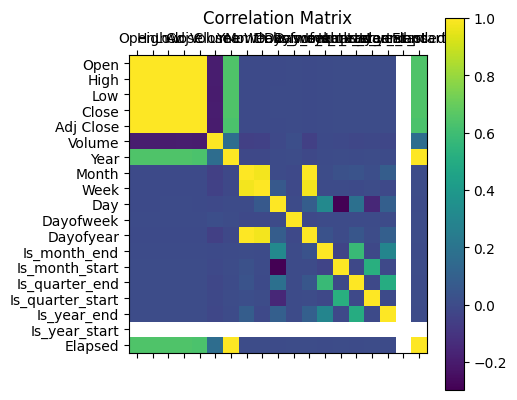

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# calculate the correlation matrix
corr_matrix = train_df.corr()

# create a heatmap of the correlation matrix
plt.matshow(corr_matrix)

# add labels and title
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')

# display the plot
plt.show()


The correlation matrix shows that the following pairs of variables have a strong positive correlation:

    Open and High
    High and Close
    Close and Adj Close
    Volume and Year
    Day and Dayofweek
    Dayofweek and Dayofyear


The correlation matrix also shows that the following pairs of variables have a weak negative correlation:

    Month and Week
    Week and Day
    Day and Dayofyear
